<a href="https://colab.research.google.com/github/Laragb21/PRA3024_BigDataPhysics/blob/main/GW_tutorial_3_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GW tutorial 3: Generation of data and matched filtering

Author: Melissa Lopez

Email: m.lopez@uu.nl

In [6]:
%matplotlib inline
from pycbc.catalog import Merger
import pycbc.psd, pycbc.noise
import pylab
import matplotlib.pyplot as plt
import numpy as np
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector
import random

Previously, we have plotted the PSD of different detectors. Some PSDs are from previous runs (O3), while some others are the design sensitivity of future detectors.

The PSD characterizes the noise of the detector, so we can generate detector noise accordingly.

**Exercise 1:** Load the `aligo_O4high.txt` PSD to [generate](https://pycbc.org/pycbc/latest/html/pycbc.noise.html#pycbc.noise.gaussian.noise_from_psd) some Gaussian data.

_Hint:_ Minimum frequency is 10 Hz, sampling rate 4096 Hz and we want 20s of duration

In [7]:
#NOTES
#For running the following codes, install pycbc in Terminal.
#The psd file with the name "aligo_O4high.txt" can be found

In [8]:
import os
print("Current directory:", os.getcwd())
print("Files here:", os.listdir('.'))

Current directory: /content
Files here: ['.config', 'aligo_O4high.txt', 'sample_data']


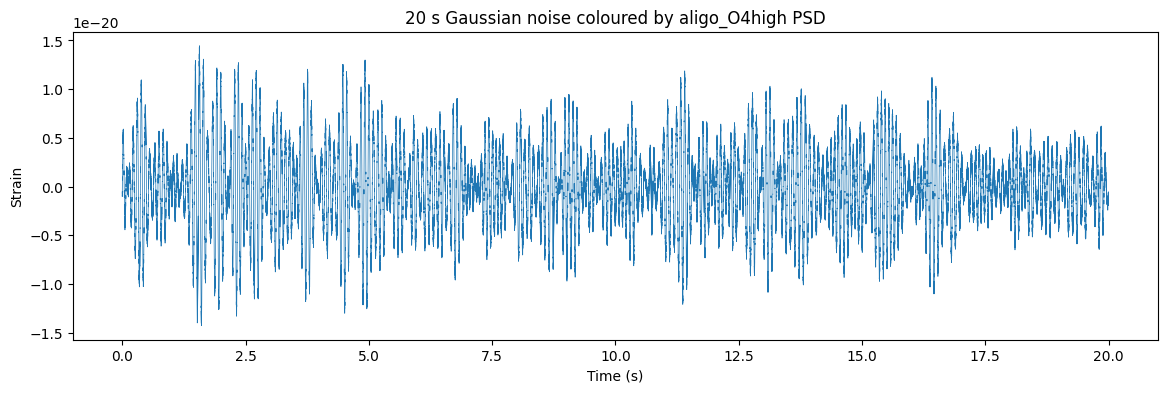

In [9]:
import pycbc.psd
'''Step 1: defining the given variables '''

duration= 20 #duration of the signal in seconds
sampling_rate= 4096  #Sampling rate in Hz
flow=10 #minimum frequency in Hz

'''Step 2: recalling the variables from Tutorial 2'''

delta_f= 1.0/duration #change in frequency of the gravitational waves (Hz)
delta_t= float(1.0/sampling_rate) #change in time over which the frequency occurs (s/sample)

'''Step 3: Calulation of data points
the +1 for the calculation of data points and positive frequency bins
accounts for the first data point at 0Hz.
Furthermore, when caluclating the positive frequency bins, the number of samples
is divided by two, so that in the symmetric distribution of frequency, only the
positive ones are counted. // is used to get an integer not a float'''

length= int(delta_f*delta_t)+1 #number of frequency data points
N = int(duration * sampling_rate)    # number of samples
positive_freq = (N // 2) + 1   # number of positive frequency bins

''' Step 4: stating the directory to the psd file and reading it,
then generating colored gaussian noise with the following 3 variables:
-N (length of noise to generate in samples)
-delta_t (time between samples)
-psd (noise weigthing to color the noise) '''

path_to_asds= "/content/"
PSD_O4 = pycbc.psd.read.from_txt(path_to_asds + "aligo_O4high.txt", positive_freq, delta_f, 11, is_asd_file = True) #from tutorial 2
ts_noise = pycbc.noise.gaussian.noise_from_psd(N, delta_t, PSD_O4 , seed=None)

'''Step 5: Plotting a graph that shows the colored gaussian noise, that was
generated by the aligo_04high psd file in a time frame of 20s'''
plt.figure(figsize=(14, 4))
plt.plot(ts_noise.sample_times, ts_noise, lw=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.title("20 s Gaussian noise coloured by aligo_O4high PSD")
plt.show()



In [11]:
from google.colab import drive
drive.mount('/content/drive')
#i could'nt run this, since errors occured when connecting my notebook to google drive?

MessageError: Error: credential propagation was unsuccessful

As you can see. the generated noise is "coloured" according to the detector noise. Now, we would like to add a simulated gravitational wave signal in our detector noise.

**Exercise 2:** Using [this function](https://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_td_waveform) to generate waveforms in time domain, provide the plus and cross polarization of a binary black hole merger of $m_{1} = m_{2} = 50$ at 2000 Mpc. Use the waveform approximant "IMRPhenomD". How does the waveform amplitude compare to the detector noise?

The waveform comes from the source, but it needs to be projected in the detector. [Project](https://pycbc.org/pycbc/latest/html/pycbc.detector.html#pycbc.detector.ground.Detector.project_wave) the waveform on LIGO Livingston (L1) at random sky-location and polarization. You can specify your detector with [this](https://pycbc.org/pycbc/latest/html/pycbc.detector.html#pycbc.detector.ground.Detector) function. How does the waveform change because of this projection?

_Hint:_ Right ascension range is $[0, 2\pi]$, declination is $[-2\pi, 2\pi]$ and polarization is $[0, 2\pi]$.

In [12]:
print(delta_t)

0.000244140625


In [13]:

'''Step 1: making a dictionary with the given waveform parameters, I called it kwargs,
because it was the example name for the explanation for the '''

kwargs = {
    'approximant': "IMRPhenomD", #waveform model
    'mass1': 50, #mass of the 1st object
    'mass2': 50, #mass of the 2nd object
    'distance': 2000, #distance to the source
    'delta_t': delta_t,
    'f_lower': 20 #starting frequency
}
'''Step 2: generating Gravitational waveforms:
Gw are emitted in two polarizations:  h+ (plus polarization) and hx (cross polarization),
to get the waveforms of the plus and cross polarizations, the kwargs dictionary
can be used to call the get_td_waveform function.
'''
hp, hc = get_td_waveform(**kwargs) #two independent polarizations

'''Step 3: Taking randomized sky locations and polarizations
Ra and Dec describe the source position in the sky.
 They are defined in Radians in the given intervals'''

ra= random.uniform(0, 2*np.pi) #right asencision of source location
dec= random.uniform((-2)*np.pi, 2*np.pi) #declination of source location
polarization= random.uniform(0, 2*np.pi)# Polarization angle of the source

'''Step 4: Projection of the waveforms onto a detector
LIGO is a GW detector, it is modeled with the given function and reference time.
Prject_wave function calculates the detector strain'''
detector = Detector("L1", reference_time=1126259462.0)
hLigo = detector.project_wave(hp, hc, ra, dec, polarization, method='lal', reference_time=hp.start_time)

''' STep 5: printing the Outcomes:
since we have the linear combination of these two detector measurements (hLigo)
we can compare it with the two polarization strains before the projection'''

print(f"maximum strain plus polarization: {hp.max()}")
print(f"maximum strain cross polarization: {hc.max()}")
print(f"maximum projected LIGO strain (hL1): {hLigo.max()}")

'''what happend after the projection?
the waveform amplitude increased because of the projection'''


maximum strain plus polarization: 5.777163779992297e-22
maximum strain cross polarization: 5.913918963873208e-22
maximum projected LIGO strain (hL1): 3.3169282017568564e-22


'what happend after the projection?\nthe waveform amplitude increased because of the projection'

**Exercise 2:** From before our detector noise is 20s long. Add the GW into noise after 5s. We also need to get the first 4s to estimate the PSD in the next excercise. Make an overlaid plot with the total data, the portion of data where the GW is added and the data needed to estimate the PSD.

_Bonus:_ Can you also plot the GW signal?


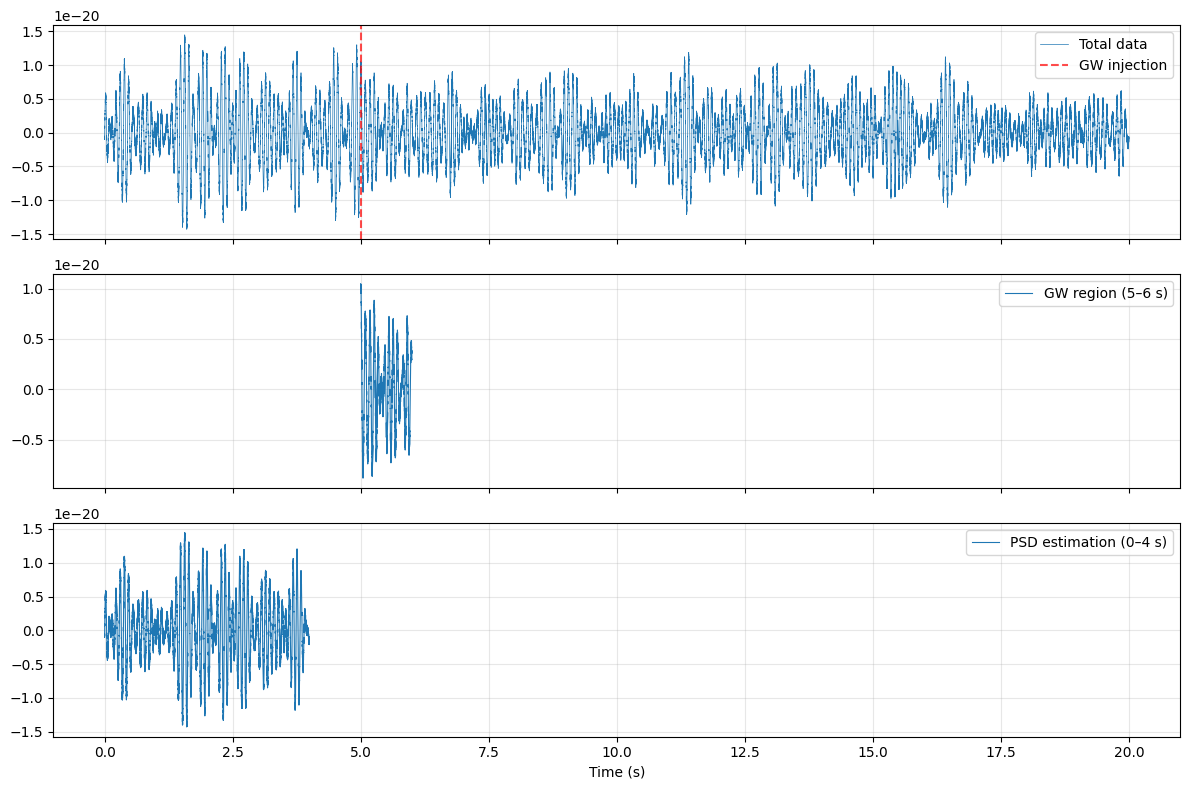

In [14]:
'''Step 1: Injection of simulated Gw signal into the gaussian noise
first the injection time and the index of where in the timeframe the
singal will be inserted are defined.  '''

t_inject = 5.0 #injection time in seconds
idx_gw = int(t_inject / delta_t) #index of insertion


'''Step 2: copying the arrays to make sure the original noise and waveform stay the same '''
ts_signal = ts_noise.copy() #copy of the total noise
hLigo = hLigo.copy()
hLigo.start_time = ts_noise.start_time + t_inject #start time of the waveform

'''Step 3: detemining the number of injection points, by using the min() function, then
making sure the array lenght is not exceeded, also n_inject ensures that only
as many points as will fit in the noise array are injected.
Moreover, the wavefrom is added to the noise at the injection time '''
n_inject = min(len(hLigo), len(ts_signal) - idx_gw) #how many points to inject
ts_signal[idx_gw:idx_gw+n_inject] += hLigo[:n_inject] #adding the waveform to the noise


'''Step 4: Extracting the interesting segments: '''
ts_psd = ts_noise[0:int(4 * sampling_rate)]      # first 4 seconds (noise only)
ts_gw_region = ts_signal[idx_gw:idx_gw+int(1 * sampling_rate)]  # 1 sec segment in between 5s-6s

'''Step 5: Axis definition'''
t_total = ts_signal.sample_times - ts_signal.start_time.gpsSeconds #fill time of injected signal
t_psd = ts_psd.sample_times - ts_psd.start_time.gpsSeconds #time for noise segment
t_gw_plot = (                              #time for GW, shifted to injection time
    ts_gw_region.sample_times
    - ts_gw_region.start_time.gpsSeconds
    + t_inject
)


'''Step 6: Plotting'''
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].plot(t_total, ts_signal, lw=0.5, label='Total data')
axes[0].axvline(t_inject, color='r', ls='--', alpha=0.7, label='GW injection')

axes[1].plot(t_gw_plot, ts_gw_region, lw=0.8, label='GW region (5–6 s)')
axes[2].plot(t_psd, ts_psd, lw=0.8, label='PSD estimation (0–4 s)')

for ax in axes:
    ax.legend()
    ax.grid(True, alpha=0.3)

axes[2].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()


**Exercise 3:** In a proper search we do not really have the PSD handy. We want to estimate the PSD with Welch's method (see [here](https://ccrma.stanford.edu/~jos/sasp/Welch_s_Method.html) for details), but we want to use the 4s of the beginning where the GW is not present using [this function](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.estimate.welch). Plot the estimated PSD. Note that before we used a dummy whitening, and this one is a bit better.

What is the $\Delta_f$ of the estimated PSD? What is $\Delta_f$ of the data we want to whiten to see the GW signal?

_Hint:_ `seg_stride (int)` is usually half of `seg_len`.


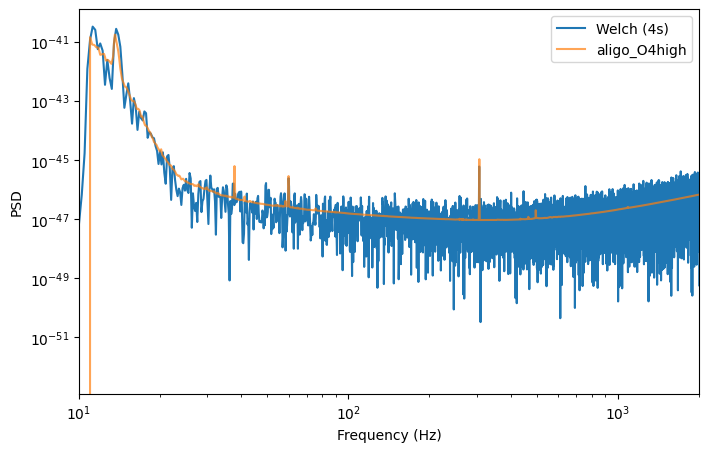

Δf PSD: 0.25 Hz, Δf data: 0.05 Hz


In [20]:
from pycbc.psd.estimate import welch

'''Step 1: Using the first 4s (GW-free) noise only data for psd estimation.
For comparison between the estimated psd (using welch function) and the reference
psd (txt file) the 4s of noise only data and welch data are defined.'''
ts_psd = ts_noise[0:int(4*sampling_rate)]  # 0-4s segment
psd_welch = welch(ts_psd, seg_len=int(4*sampling_rate), seg_stride=int(2*sampling_rate))

'''Step 2: Frequency resolutions'''
df_psd = psd_welch.delta_f #frequency spacing of psd estimate
df_data = 1.0 / ts_signal.duration #Frequency spacing of time series

'''Step 3: Plotting
The loglog scale is used so that the differences over high magnitudes can be shown'''
plt.figure(figsize=(8, 5))
plt.loglog(psd_welch.sample_frequencies, psd_welch, label='Welch (4s)')
plt.loglog(PSD_O4.sample_frequencies, PSD_O4, alpha=0.7, label='aligo_O4high')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.xlim(10, 2000)
plt.show()

''' What is Δf of the estimated PSD? What is Δf of the data we want to whiten to see the GW signal'''
print(f"Δf PSD: {df_psd} Hz, Δf data: {df_data} Hz")




Now that we have the PSD we need to interpolate it to match our data and then limit the filter length of 1 / PSD. After this, we can directly use this PSD to filter the data. Since the data has been highpassed above 12 Hz, and will have low values below this we need to informat the function to not include frequencies below this frequency.

**Exercise 4:** Use the functions [interpolate](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.estimate.interpolate) and [inverse_spectrum_truncation](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.estimate.inverse_spectrum_truncation) to achieve a proper formatting of the PSD.

_Hint:_ `max_filter_len (int)` is $4 \times$ sampling_rate. Note that the original PSD has a minimum frequency of 12Hz.

In [16]:
from pycbc.psd.estimate import interpolate, inverse_spectrum_truncation

'''Step 1: Interpolating
The given interpolate function is used, where the following parameters are considered:
-estimated psd frequency series (welch)
-desired delta f, in this case frequency spacing of the full time series
-desired number of frequency samples
- number of positive frequency bins'''

psd_int = interpolate(
    psd_welch,
    delta_f=ts_signal.delta_f,
    length=len(ts_signal)//2 + 1
)

'''Step 2:  Truncation of the inverse spectrum filter
Applying inverse spectrum truncation to prepare the psd data for whitening
by using the inverse_spectrum_truncation function.
'''
max_filter_len = 4 * sampling_rate #maximum lenght of time filter (samples)
psd_ready = inverse_spectrum_truncation(psd_int, max_filter_len, low_frequency_cutoff=12)
#low_frequency_cutoff removes the data under 12Hz, where psd might be unreliable


Now that the PSD is ready, we can whiten the data. Before we used a PyCBC function, but mathematically this is defined as

\begin{equation}
\tilde{d_w}(f) = \tilde{d}(f)/S_{n}^{-1/2}(f)
\end{equation}
where $\tilde{d}$ and $\tilde{d_w}(f)$ are the Fourier transform of the coloured data and whitened data, respectively.

**Exercise 5:** Whiten the data using the interpolated PSD. Crop 5s at the beginning and the end to avoid border effects (_aliasing_) and bandpass it as in the previous exercise. Can you see the GW signal?

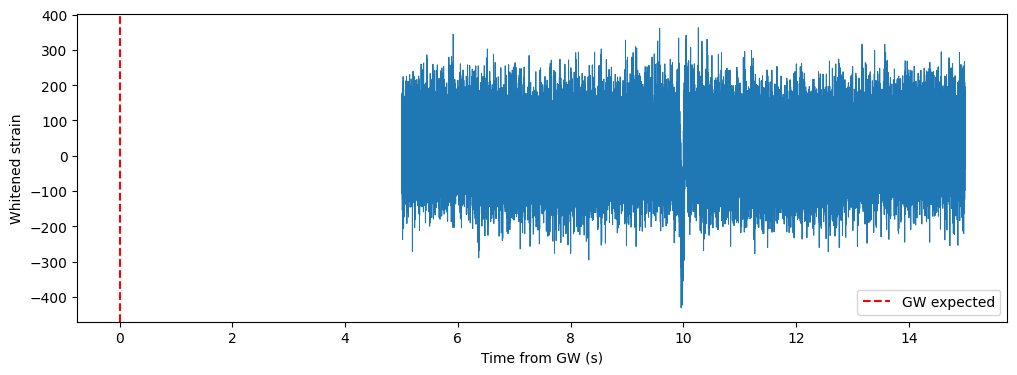

In [17]:
from pycbc.filter import make_frequency_series
'''Step 1: Computation of the full time series (ts_signal) into the frequency
domain. It is whitend by the square root of the interpolated PSD, because
 psd_int matches the frequency resolution of data_freq. Then it is transformed
 back to the time domain.'''

data_freq = make_frequency_series(ts_signal) #full time series
white_freq = data_freq / (psd_int ** 0.5) #whitening the frequency
white_data = white_freq.to_timeseries() #transforming the data back to the time domain (whitened data)

'''Step 3: Applying the bandpass filtering.
the filtering removes frequencies that lie outside the detectors band and where
the Ligo sensitivity decreases.High pass is at 12Hz and low pass is at 2000Hz.
Then the data is croped at both ends, by removing 5s to get a clear cut.'''
white_data = white_data.highpass_fir(12, 4) #high pass
white_data = white_data.lowpass_fir(2000, 4) #low pass
white_data = white_data.crop(5, 5) #crop filter

'''Step 4: Defining the Axes and plotting.
The time axis needs to be shifted so that the starting point (t=0) is the expected
arrival time of the GW signal.'''

t_white = white_data.sample_times - white_data.start_time.gpsSeconds + 5 #shifting of the x-axis

plt.figure(figsize=(12, 4))
plt.plot(t_white, white_data, lw=0.7)
plt.axvline(0, color='r', ls='--', label='GW expected')
plt.xlabel('Time from GW (s)')
plt.ylabel('Whitened strain')
plt.legend()
plt.show()


So far, we buried a GW signal  $h(t)$ in stationary and Gaussian noise $n(t)$ with zero mean, such that $s(t) = h(t) + n(t)$. Given the optimal filter  $K(t)$,

\begin{equation}
\label{eq:filteredsignal}
\hat{s} = \int_{-\infty}^{\infty}  K(t)s(t) dt = \int_{-\infty}^{\infty} \tilde{K}(f)^{*}\tilde{s}(f) df, \quad \text{ where }  \tilde{s}(f) = \int_{-\infty}^{\infty} s(t)e^{-2 \pi i ft}dt
\end{equation}
where $\hat{s}$ is the filtered value of $s(t)$, $^*$ represents the complex conjugate, and $\tilde{\cdot }\ $ the Fourier transform.

The detection statistic that is maximised by the optimal filter $K(t)$  will be the SNR, defined as $\rho = S/N$. $S$ is the expected value of $\hat{s}$ when $h(t) \neq 0$, while $N$ is the squared root of the noise variance when $h(t) =0$. It can be demonstrated that the optimal filter $K(t)$ is the model of the GW signal itself, known as _template_.

The fundamental modelled detection technique is called "matched filtering", since the filter function is chosen to "match" the signal we are looking for. We can write the SNR between an unknown time series $s(t)$ and the template $h_{m}$ as

\begin{equation}
\label{eq:wienerscalar}
\rho =  4 \text{Re} \int_{0}^{\infty} \frac{\tilde{s}^{*}(f)}{S_{n}(f)} \tilde{h_{m}}(f) df.
\end{equation}



**Exercise 6:** Use the [matched_filter](https://pycbc.org/pycbc/latest/html/pycbc.filter.html#pycbc.filter.matchedfilter.matched_filter) function to filter the coloured data with the template. Crop the SNR time series 5s at each side and plot it together with the whitened data. Where is the GW signal? Note that the y-axis of the whitened data is _amplitude_ and the y-axis of the SNR timeseries is _SNR_.

How much is the maximum of the absolute value of the SNR time series? If it is larger than 5 it will generate a "trigger" for further analysis. Will the trigger be generated?

Note that the parameter space of GW signals is vast, so to find these signals, we will need to create a template bank and do this process for thousands of templates. Then, this becomes a high-performance computing problem!

_Hint_: you need to [resize](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.array.Array.resize) the template and use [cyclic_time_shift](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.frequencyseries.FrequencySeries.cyclic_time_shift)

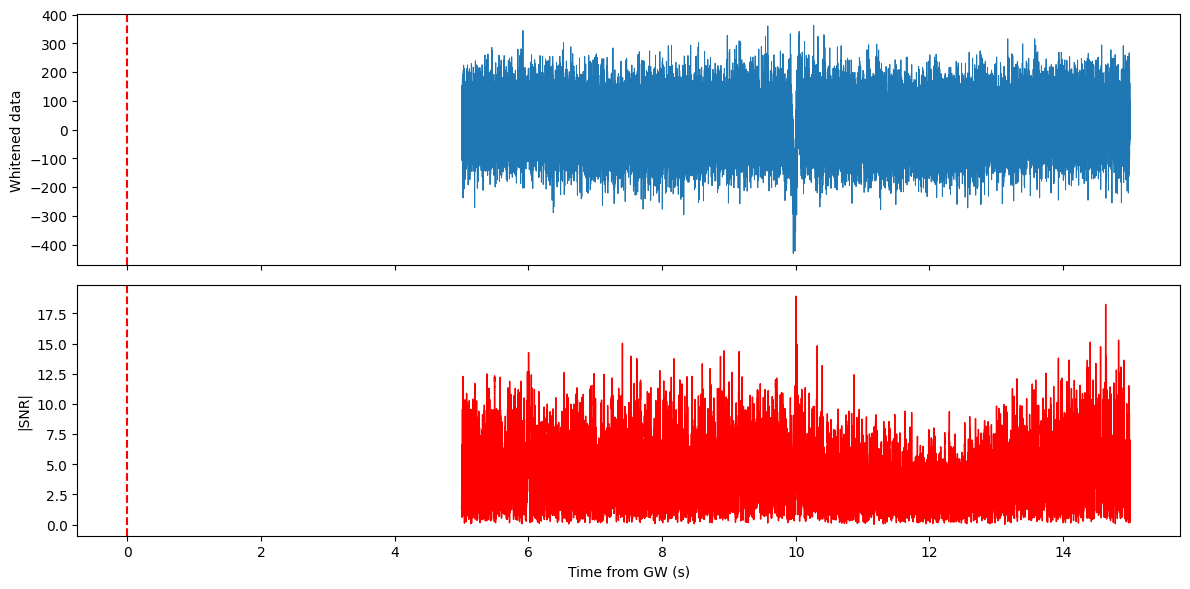

Maximum absolute SNR = 18.920633826053344
Trigger is generated, because SNR is bigger than 5


In [19]:
from pycbc.filter import matched_filter
'''Step 1: Defining the template.
hLigo is the detector-projected waveform and a copy is made to prevent changes in the original data.
Then the template is resized to the length of the whitened data.'''
template = hLigo.copy() #copy
template.resize(len(white_data)) #resizing

'''Step 2: time-Alignment.
SInce the GW was injected at 5s, the template is cyclically shifted to align
with the injection time. Also the GPS times are converted to seconds for matching calculations.'''
template_shift = template.cyclic_time_shift(
    template.start_time.gpsSeconds + 5 - ts_signal.start_time.gpsSeconds
)

template_shift.resize(len(ts_signal))  # matching lengths of data and template


'''Step 3: Matching the data.
The optimal SNR times are generated the matched filter. '''
snr = matched_filter(template_shift, ts_signal, psd=psd_ready)
snr = snr.crop(5, 5)

'''Step 4: Plotting'''
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
ax1.plot(t_white, white_data, lw=0.7)
ax1.set_ylabel('Whitened data')
ax1.axvline(0, color='r', ls='--')

t_snr = snr.sample_times - snr.start_time.gpsSeconds + 5
ax2.plot(t_snr, abs(snr), 'r-', lw=1)
ax2.set_ylabel('|SNR|')
ax2.set_xlabel('Time from GW (s)')
ax2.axvline(0, color='r', ls='--')

plt.tight_layout()
plt.show()

'''Step 5: Maximum SNR.
To find if the trigger is generated, The maximum absolute SNR is extracted
using the max() and abs() function '''
max_snr = abs(snr).max()
print(f"Maximum absolute SNR = {max_snr}")
print("Trigger is generated, because SNR is bigger than 5")




#nn


















#from from

There is a bonus track exercise if you are bored, but we can also have a chat about some more GW data analysis if you prefer.